In [1]:
import torch.optim as optim
from IPython.display import clear_output
from rl.agent import DQNAgent_GCN
from gymjsp.jsspenv import HeuristicJsspEnv, HeuristicGraphJsspEnv
import networkx as nx
import numpy as np
import torch
from train_dqn_gcn import train_dqn_gcn

In [2]:
num_episodes = 100
memory_size = 100000
batch_size = 64
target_update = 100
plotting_inteval = 10


In [3]:
ret = {}
instances = ["ft06", "la01", "la06", "la11", "la21", "la31", "la36", "orb01", "swv01", "swv06", "swv11", "yn1", 
            "swv12", "swv13", "swv14", "swv15"]

In [4]:
instances = ["swv11"]

In [5]:
#### a test of gcn input and output
""""
from rl.network import GCN
env = HeuristicGraphJsspEnv("ft06")
env.reset()
net = GCN(num_node_features=10, num_classes=8)
edge_index = torch.FloatTensor(env.edge_index).long()
x = torch.zeros((64, 360))
print(x.shape)
out = net(x, edge_index, batch_size=64)
print(out.shape)
"""
"""
torch.Size([64, 360])
torch.Size([64, 8])
"""

'\ntorch.Size([64, 360])\ntorch.Size([64, 8])\n'

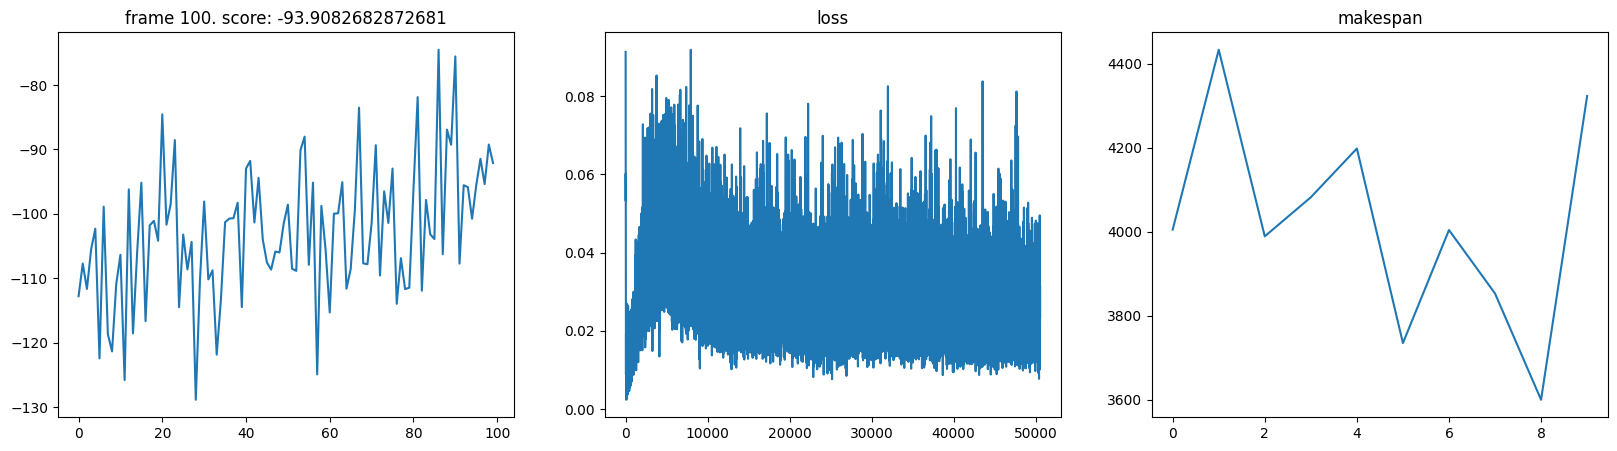

In [6]:
for instance in instances:
    plot_file = f"plots_training_dynamic_gcn/{instance}_num_episodes={num_episodes}_memory_size={memory_size}_target_update={target_update}.png"
    policy, t = train_dqn_gcn(instance, num_episodes=num_episodes, memory_size=memory_size, batch_size=batch_size, 
                          target_update=target_update, plotting_interval=plotting_inteval, save_plot=plot_file)
    policy_file = f"policies/dqn_gcn/{instance}_num_episodes={num_episodes}_memory_size={memory_size}_target_update={target_update}.pth"
    torch.save(policy.state_dict(), policy_file)
    ret[instance] = t

In [7]:
ret

{'swv11': 4199}